In [2]:
import sympy as sp 
import numpy as np
def sp_to_linspace(sp, var, input):
    """
    converts a sympy expression to a numpy linspace
    """
    f = sp.lambdify(var, sp, modules='numpy')
    return input, f(input)

(E/2 + q)**2/(E**2/4 + 1)

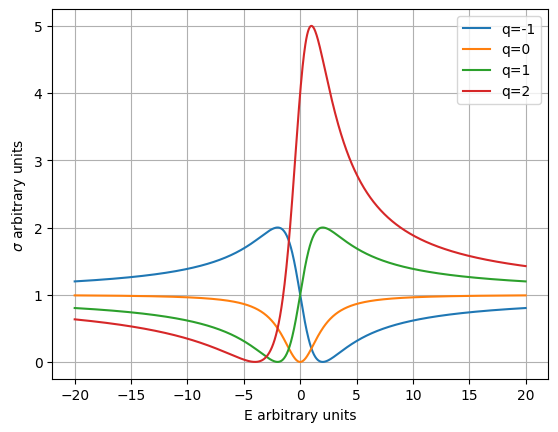

In [3]:
import matplotlib.pyplot as plt

# set style for plt


sigma = sp.Symbol('\sigma')
epsilon = sp.Symbol('\epsilon')
E, E_0 = sp.symbols('E E_0')
q = sp.Symbol('q')
fwhm = sp.Symbol('\Gamma')

epsilon = (E - E_0)/fwhm

sigma_base = ((q + epsilon)**2)/(1 + epsilon**2)


sigma = sigma_base.subs({E_0: 0,  fwhm: 2})

display(sigma)
# plot sigma
sigma_one = sp.lambdify(E,sigma.subs({q: 1}))
sigma_minus_one = sp.lambdify(E,sigma.subs({q: -1}))
sigma_zero = sp.lambdify(E,sigma.subs({q: 0}))
sigma_two = sp.lambdify(E,sigma.subs({q: 2}))

x = np.linspace(-20, 20, 1000)
plt.plot(x, sigma_minus_one(x), label='q=-1')
plt.plot(x, sigma_zero(x), label='q=0')
plt.plot(x, sigma_one(x), label='q=1')
plt.plot(x, sigma_two(x), label='q=2')

plt.xlabel('E arbitrary units')
plt.ylabel('$\sigma$ arbitrary units')

plt.grid()

plt.legend()
plt.show()




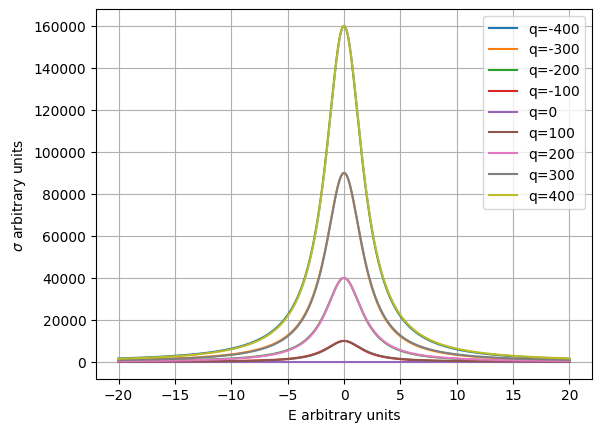

In [4]:
#1.2 version 1
for i in range(-4, 5):
    plt.plot(x, sp.lambdify(E,sigma.subs({q:i*100}))(x), label=f'q={i*100}')

plt.xlabel('E arbitrary units')
plt.ylabel('$\sigma$ arbitrary units')

plt.grid()

plt.legend()

plt.show()

In [5]:
#1.2 version 2
E_prim = sp.Symbol('E_prim')

sigma_lim = sigma_base
display(sigma_lim)
# we introduce q_n  = q/E to induce convergence
sigma_lim = sigma_lim.subs({q: q/E})
display(sp.simplify(sigma_lim))

# lim q -> infty
sigma_lim = sp.limit(sigma_lim, q, sp.oo)

display(sigma_lim)


(q + (E - E_0)/\Gamma)**2/(1 + (E - E_0)**2/\Gamma**2)

(E*(E - E_0) + \Gamma*q)**2/(E**2*(\Gamma**2 + (E - E_0)**2))

oo*sign(1/(E**2*(1 + (E - E_0)**2/\Gamma**2)))

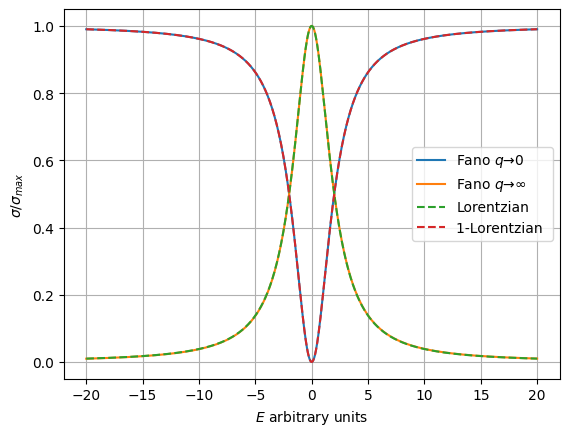

In [18]:
#Comparison lorentian and fano @ 0 and infty
fwhm_val = 2
sigma_large = sigma_base.subs({E_0: 0,  fwhm: fwhm_val, q: 1000})
sigma_large = sp.lambdify(E,sigma_large)
plt.plot(x, sigma_zero(x), label='Fano $q \\to 0$')
plt.plot(x, sigma_large(x)/np.max(sigma_large(x)), label='Fano $q \\to \infty$')

# lorentian
plt.plot(x, 1/(1+(x/fwhm_val)**2), label='Lorentzian', linestyle='--')
plt.plot(x, 1-1/(1+(x/fwhm_val)**2), label='1-Lorentzian ', linestyle='--')
# lorentian
plt.grid()

plt.xlabel('$E$ arbitrary units')
plt.ylabel('$\sigma/\sigma_{max}$')

plt.legend()
plt.show()